In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def load_log(path):
  cur_perceptual_loss = []
  cur_equivariance_loss = []
  cur_warp_loss = []

  with open(path, "r") as f:
    for line in f:
      cur_line = line.rstrip().split()
      cur_perceptual_loss.append(float(cur_line[3][:-1]))
      cur_equivariance_loss.append(float(cur_line[6][:-1]))
      cur_warp_loss.append(float(cur_line[9]))

  return cur_perceptual_loss, cur_equivariance_loss, cur_warp_loss

In [ ]:
pass1_p_loss, pass1_e_loss, pass1_w_loss = load_log("pass1_log.txt")
pass2_p_loss, pass2_e_loss, pass2_w_loss = load_log("pass2_log.txt")
pass3_p_loss, pass3_e_loss, pass3_w_loss = load_log("pass3_log.txt")

In [ ]:
perceptual_losses = [pass1_p_loss, pass2_p_loss, pass3_p_loss]  # reconstruction loss between D and the generated image Dˆ at multiresolutions
equivariance_losses = [pass1_e_loss, pass2_e_loss, pass3_e_loss]  # used to constrain the Keypoint Detector
warp_losses = [pass1_w_loss, pass2_w_loss, pass3_w_loss]  # warp loss for inpainting network

In [ ]:
total_losses = [
  np.array(pass1_p_loss) + np.array(pass1_e_loss) + np.array(pass1_w_loss),
  np.array(pass2_p_loss) + np.array(pass2_e_loss) + np.array(pass2_w_loss),
  np.array(pass3_p_loss) + np.array(pass3_e_loss) + np.array(pass3_w_loss),
]

In [ ]:
def plot_loss(xs, labels, title):
  for x, label in zip(xs, labels):
    plt.plot(x, label=label)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title(title)
  plt.legend(loc="upper right")
  plt.show()

In [ ]:
labels = ["Pass 1", "Pass 2", "Pass 3"]

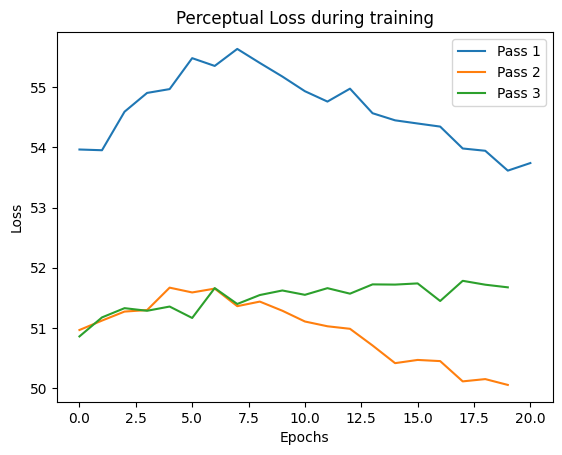

In [ ]:
plot_loss(perceptual_losses, labels, "Perceptual Loss during training")

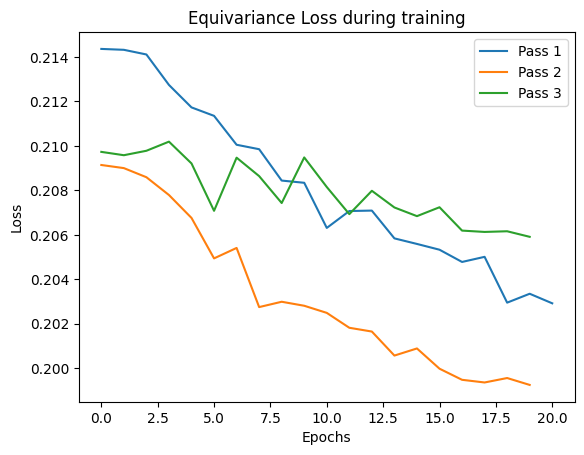

In [ ]:
plot_loss(equivariance_losses, labels, "Equivariance Loss during training")

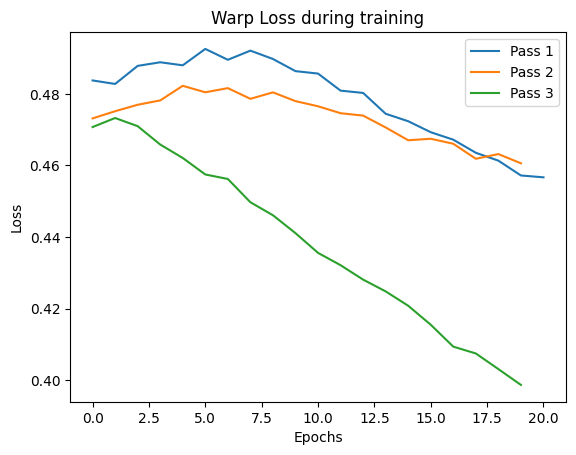

In [ ]:
plot_loss(warp_losses, labels, "Warp Loss during training")

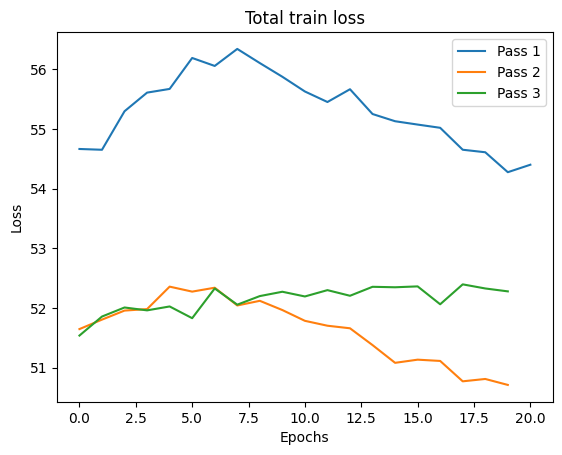

In [ ]:
plot_loss(total_losses, labels, "Total train loss")